# Анализ рынка заведений общественного питания Москвы для принятия решения об открытии нового заведения

Необходимо подготовить исследование заведений общественного питания Москвы, найти интересные особенности, которые в будущем помогут в выборе подходящего инвесторам места.

Для исследования доступны данные сервисов Яндекс.Карты и Яндекс.Бизнес на лето 2022 года (`moscow_places.csv`).

Описание данных:

* `name` — название заведения;
* `address` — адрес заведения;
* `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
* `hours` — информация о днях и часах работы;
* `lat` — широта географической точки, в которой находится заведение;
* `lng` — долгота географической точки, в которой находится заведение;
* `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
* `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
* `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
* `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»;
* `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки);
* `district` — административный район, в котором находится заведение, например Центральный административный округ;
* `seats` — количество посадочных мест.

**План исследования:**

**1.** Обзор и предобработка данных

**2.** Исследовательский анализ данных:
* Анализ количества объектов общественного питания по категориям
* Анализ количества посадочных мест по категориям
* Анализ количества сетевых и несетевых заведений
* Анализ сетевых заведений по категориям
* ТОП-15 сетей в Москве
* Анализ категорий заведений по районам
* Анализ рейтингов заведений по категориям
* ТОП-15 улиц по количеству заведений
* Улицы, на которых расположен 1 объект общепита
* Анализ среднего чека заведений по районам
* Анализ часов работы заведений

**3.** Исследование рентабильности открытия кофейни


### Обзор данных

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import json
import folium
from folium.plugins import MarkerCluster
from folium.features import CustomIcon

In [19]:
plt.style.use('seaborn')

In [20]:
#для корректной работы необходимо установить matplotlib версии не ниже 3.4.1

In [21]:
#conda install matplotlib=3.4.1

In [22]:
try:
    data = pd.read_csv('/datasets/moscow_places.csv')
except:
    data = pd.read_csv('moscow_places.csv')
data.head()

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0    4.0  
2                NaN      0   45.0  
3              170.0      0    NaN  
4                NaN      1  148.0

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Столбцы хранят значения следующих типов данных:

* `name`, `category`, `address`, `district`, `hours`, `price`, `avg_bill` - `object`, что в данном случае корректно, так как в столбцах записаны текстовые значения

* `lat`, `lng`, `rating` - `float64`, что корректно, так как в данных столбцах дробные числа

* `chain` - `int64`, что корректно, так как данный столбец хранит целые числа *1* и *0*

* `middle_avg_bill`, `middle_coffee_cup`, `seats` - `float64`, в данном случае можно заменить тип данных на `int`, так как в столбце хранятся целые числа

In [24]:
print(f'Всего заведений: {data.shape[0]}')
print(f'Уникальных названий заведений: {len(data["name"].unique())}')

Всего заведений: 8406
Уникальных названий заведений: 5614


### Предобработка данных

**Проверим наличие аномалий в данных.**

Проверим наличие аномальных значений в столбце с рейтингом заведений.

In [25]:
print(data['rating'].min())
print(data['rating'].max())
data['rating'].describe()

1.0
5.0


count    8406.000000
mean        4.229895
std         0.470348
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Низкие оценки ставят очень редко, 75% заведений имеют оценку выше 4.1, а в среднем по всем заведениям оценка составила 4.2.

Посмотрим, как распределены значения в столбцах с количеством посадочных мест (`seats`), с оценкой среднего чека (`middle_avg_bill`)  и с оценкой средней чашки кофе (`middle_coffee_cup`).

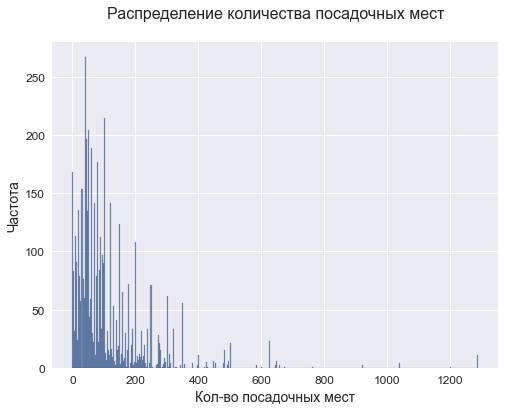

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(data, x='seats', bins=400)
plt.title('Распределение количества посадочных мест\n', fontsize=16)
plt.ylabel('Частота', fontsize=14)
plt.xlabel('Кол-во посадочных мест', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

Основная часть значений распределена в пределах от 0 до 450 посадочных мест. При этом в датасете есть заведения с аномально большим количеством посадочных мест, например, более 1200. Оставим эти значения в датасете, но в дальнейшем исследовании будем использовать медиану для расчетов, что позволит не исказить ситуацию из-за выбросов.

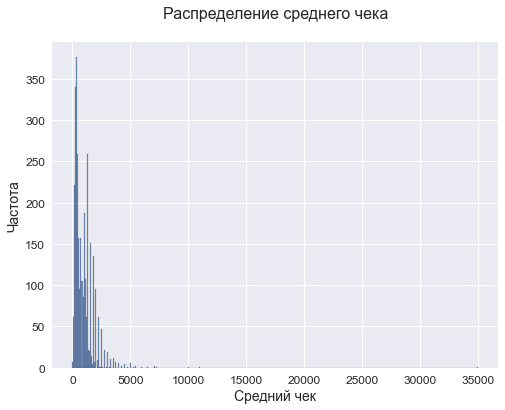

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(data, x='middle_avg_bill', bins=400)
plt.title('Распределение среднего чека\n', fontsize=16)
plt.ylabel('Частота', fontsize=14)
plt.xlabel('Средний чек', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

Большая часть значений лежит в пределах 5000 руб., но есть аномально высокие значения, например, 35000 руб. 

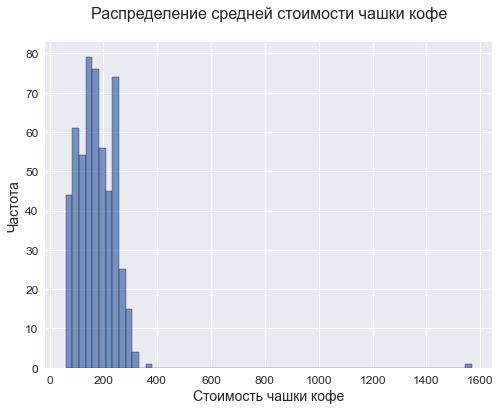

In [28]:
plt.figure(figsize=(8,6))
sns.histplot(data, x='middle_coffee_cup')
plt.title('Распределение средней стоимости чашки кофе\n', fontsize=16)
plt.ylabel('Частота', fontsize=14)
plt.xlabel('Стоимость чашки кофе', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

Большая часть значений лежит в пределах от 50 до 350 руб. Тут также есть аномально высокие значения, например, 1500 руб за чашку кофе. Однако, как в случае с количеством посадочных мест, оставим аномальные значения в столбцах `middle_avg_bill` и `middle_coffee_cup` и в дальнейшем исследовании будем использовать медиану.

Посмотрим на категории заведений и категории цен заведений.

In [29]:
print(data['category'].unique())
data['price'].unique()

['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']


array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

**Проверим наличие дубликатов в данных.**

In [30]:
data.duplicated().sum()

0

Проверим, нет ли в датасете дубликатов заведений, находящихся по одному адресу.

In [31]:
data[['name', 'address']].duplicated().sum()

0

Проверим, есть ли неявные дубликаты заведений, находящихся по одному адресу. Для этого заменим в названиях заведений символы `.`, `’`. `"`, `é`, удалим лишние пробелы, также приведем все названия к нижнему регистру. Так, например, *Яндекс.Лавка* и *Яндекс Лавка* будут записаны одинаково *яндекс лавка*.

In [32]:
data['name'] = data['name'].str.replace('[’]','', regex=True)
data['name'] = data['name'].str.replace('[.]',' ', regex=True)
data['name'] = data['name'].str.replace('[é]','e', regex=True).str.lower().str.strip()

In [33]:
# количество найденных дубликатов
data[['name', 'address']].duplicated().sum()

3

In [34]:
data[data[['name', 'address']].duplicated(keep=False)]

name  category  \
1430                  more poke  ресторан   
1511                  more poke  ресторан   
2211  раковарня клешни и хвосты  ресторан   
2420  раковарня клешни и хвосты   бар,паб   
3091            хлеб да выпечка  булочная   
3109            хлеб да выпечка      кафе   

                                      address  \
1430  Москва, Волоколамское шоссе, 11, стр. 2   
1511  Москва, Волоколамское шоссе, 11, стр. 2   
2211               Москва, проспект Мира, 118   
2420               Москва, проспект Мира, 118   
3091              Москва, Ярцевская улица, 19   
3109              Москва, Ярцевская улица, 19   

                                     district  \
1430          Северный административный округ   
1511          Северный административный округ   
2211  Северо-Восточный административный округ   
2420  Северо-Восточный административный округ   
3091          Западный административный округ   
3109          Западный административный округ   

                                                  hours        lat        lng  \
1430                             ежедневно, 09:00–21:00  55.806307  37.497566   
1511  пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...  55.806307  37.497566   
2211                             ежедневно, 12:00–00:00  55.810553  37.638161   
2420  пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...  55.810677  37.638379   
3091                             ежедневно, 09:00–22:00  55.738886  37.411648   
3109                                                NaN  55.738449  37.410937   

      rating price avg_bill  middle_avg_bill  middle_coffee_cup  chain  seats  
1430     4.2   NaN      NaN              NaN                NaN      0  188.0  
1511     4.2   NaN      NaN              NaN                NaN      1  188.0  
2211     4.4   NaN      NaN              NaN                NaN      0  150.0  
2420     4.4   NaN      NaN              NaN                NaN      1  150.0  
3091     4.1   NaN      NaN              NaN                NaN      1  276.0  
3109     4.1   NaN      NaN              NaN                NaN      0  276.0

In [35]:
# удалим дубликаты
data = data.drop_duplicates(['name', 'address'])

**Посмотрим в каких столбцах у нас имеются пропуски.**

In [36]:
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 535
lat                     0
lng                     0
rating                  0
price                5088
avg_bill             4587
middle_avg_bill      5254
middle_coffee_cup    7868
chain                   0
seats                3611
dtype: int64

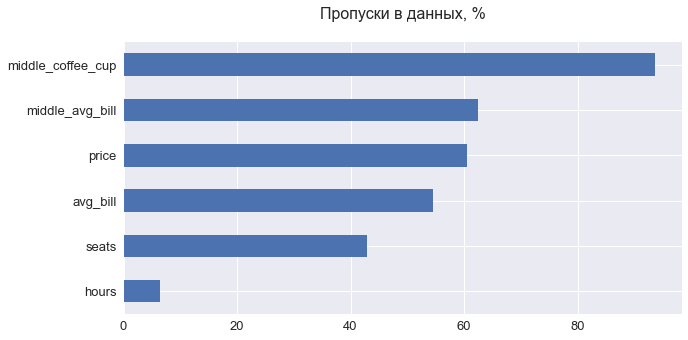

In [37]:
# относительное значение пропущенных значений (бары)
(
    (data.isna().mean() * 100)
    .to_frame()
    .rename(columns={0: 'space'})
    .query('space > 0')
    .sort_values(by='space')
    .plot(kind='barh', legend=False, figsize=(10, 5), fontsize=13)
    .set_title('Пропуски в данных, %\n', fontsize=16)
);

В столбцах `middle_coffee_cup`, `middle_avg_bill`, `price`, `avg_bill`, `hours` пропуски оставим без изменения.

В столбце `seats` значения пропущены более, чем в 40% данных и при заполнении медианой может произойти сдвиг итогового медианного значения, поэтому оставим пропуски. В остальных столбцах также оставим пропуски как есть.

In [38]:
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 535
lat                     0
lng                     0
rating                  0
price                5088
avg_bill             4587
middle_avg_bill      5254
middle_coffee_cup    7868
chain                   0
seats                3611
dtype: int64

**Создадим дополнительный столбец, который будет содержать названия улиц из столбца с адресом.**

In [39]:
data['street'] = data['address'].str.split(pat=', ', expand=True)[1]

**Создадим дополнительный столбец с обозначением, что заведение работает ежедневно и круглосуточно.**

In [40]:
data['is_24/7'] = data['hours'].str.contains('ежедневно, круглосуточно', regex=False)
data.head()

name  category                              address  \
0                wowфли      кафе           Москва, улица Дыбенко, 7/1   
1        четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 хазри      кафе       Москва, Клязьминская улица, 15   
3  dormouse coffee shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             иль марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats                   street is_24/7  
0                NaN      0    NaN            улица Дыбенко   False  
1                NaN      0    4.0            улица Дыбенко   False  
2                NaN      0   45.0       Клязьминская улица   False  
3              170.0      0    NaN  улица Маршала Федоренко   False  
4                NaN      1  148.0      Правобережная улица   False

**Создадим столбец с аббревиатурой названий административных районов.**

In [41]:
data['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [42]:
def district_short(row):
    if row['district'] == 'Северный административный округ':
        return 'САО'
    elif row['district'] == 'Северо-Восточный административный округ':
        return 'СВАО'
    elif row['district'] == 'Северо-Западный административный округ':
        return 'СЗАО'
    elif row['district'] == 'Западный административный округ':
        return 'ЗАО'
    elif row['district'] == 'Центральный административный округ':
        return 'ЦАО'
    elif row['district'] == 'Восточный административный округ':
        return 'ВАО'
    elif row['district'] == 'Юго-Восточный административный округ':
        return 'ЮВАО'
    elif row['district'] == 'Южный административный округ':
        return 'ЮАО'
    else:
        return 'ЮЗАО'

In [43]:
data['district_short'] = data.apply(district_short, axis=1)

### Исследовательский анализ данных

<a id="1"></a> 
#### Анализ количества объектов общественного питания по категориям

In [44]:
data_by_category = (
    data.groupby('category', as_index=False)
    .agg({'name': 'count'})
    .sort_values(by='name', ascending=False)
    .reset_index(drop=True)
)
data_by_category.columns = ['category', 'quantity']
data_by_category

category  quantity
0             кафе      2377
1         ресторан      2042
2          кофейня      1413
3          бар,паб       764
4         пиццерия       633
5  быстрое питание       603
6         столовая       315
7         булочная       256

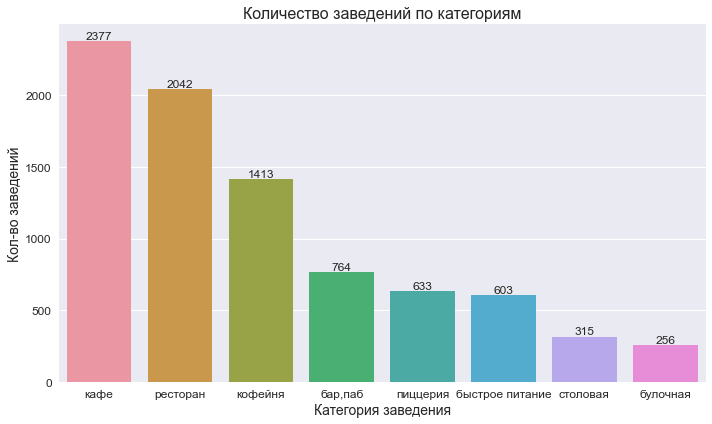

In [45]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='category', y='quantity', data=data_by_category)
ax.bar_label(ax.containers[0], size=12)
plt.title('Количество заведений по категориям', fontsize=16)
plt.xlabel('Категория заведения', fontsize=14)
plt.ylabel('Кол-во заведений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

**Вывод:**

Кафе и рестораны являются наиболее распространенными видами заведений в Москве, столовых и булочных меньше всего.

<a id="2"></a>
#### Анализ количества посадочных мест по категориям

Рассчитаем медиану количества посадочных мест для каждой категории. Медиану используем, чтобы минимизировать влияние выбросов.

In [46]:
median_seats_by_category = (
    data.groupby('category', as_index=False)['seats']
    .median()
    .sort_values(by='seats', ascending=False)
    .reset_index(drop=True)
)
median_seats_by_category.columns = ['category', 'median_seats']
median_seats_by_category

category  median_seats
0         ресторан          86.0
1          бар,паб          82.0
2          кофейня          80.0
3         столовая          75.5
4  быстрое питание          65.0
5             кафе          60.0
6         пиццерия          55.0
7         булочная          50.0

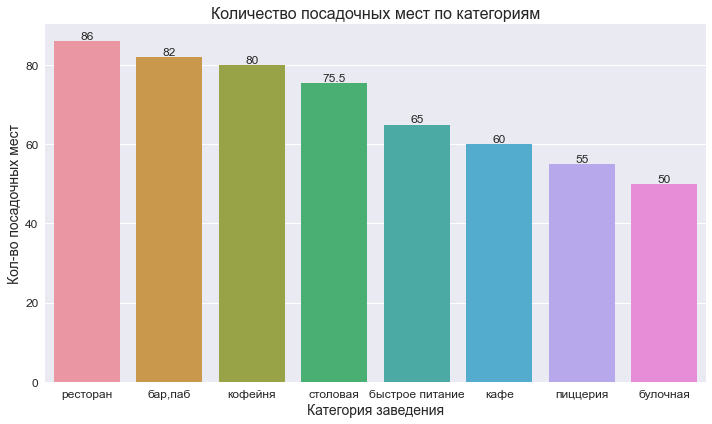

In [47]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='category', y='median_seats', data=median_seats_by_category)
ax.bar_label(ax.containers[0], size=12)
plt.title('Количество посадочных мест по категориям', fontsize=16)
plt.xlabel('Категория заведения', fontsize=14)
plt.ylabel('Кол-во посадочных мест', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

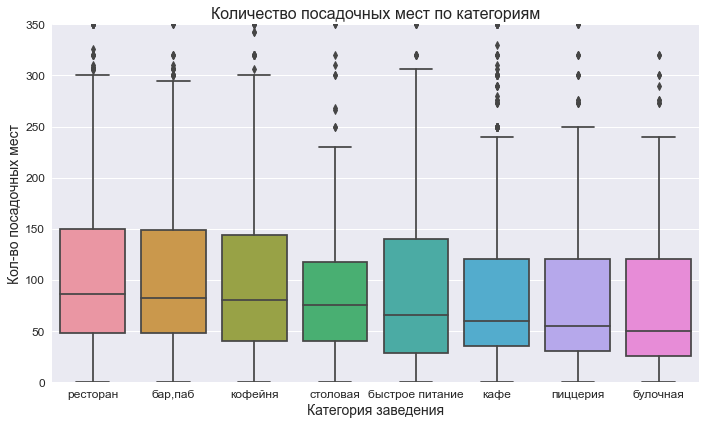

In [48]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='category', y='seats', data=data, order=median_seats_by_category['category'])
plt.title('Количество посадочных мест по категориям', fontsize=16)
plt.xlabel('Категория заведения', fontsize=14)
plt.ylabel('Кол-во посадочных мест', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.ylim(0, 350);

**Вывод:**

В среднем больше всего посадочных мест в ресторанах и барах/пабах, при этом в пиццериях и булочных наименьшее количество мест. У заведений быстрого питания досточно сильный разброс значений, граница 1 квартиля самая низкая, при этом граница 3 квартиля сравнима с первой тройкой заведений, у которых наиболее высокая медиана и граница 3 квартиля, то есть разброс значений наибольший. В столовых разброс значений наименьший и 3 квартиль находится наиболее низко, значит в столовых основная часть количества посадочных мест меньше, чем у остальных категорий.

<a id="3"></a>
#### Анализ соотношения количества сетевых и несетевых заведений

In [49]:
chain_grouped = data.groupby('chain', as_index=False)['name'].count().rename(columns={'name': 'quantity'})
chain_grouped['chain'] = chain_grouped['chain'].map({0: 'Не сеть', 1: 'Сеть'})
chain_grouped

chain  quantity
0  Не сеть      5200
1     Сеть      3203

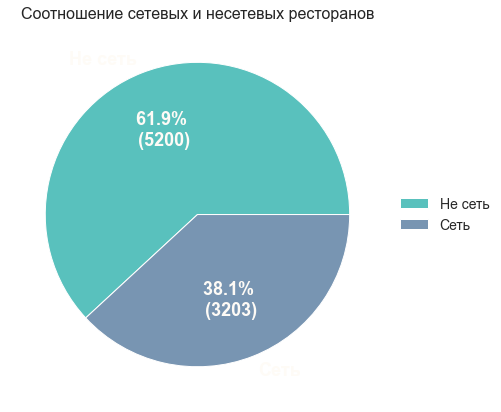

In [50]:
fig, ax = plt.subplots(figsize=(7, 7))
colors = ['#59C1BD', '#7895B2']
wedges, texts, autotexts = ax.pie(chain_grouped['quantity'], labels=chain_grouped['chain'], colors=colors, 
                                  autopct=(
                                      lambda pct: "{:1.1f}% \n({:.0f})".format(pct, chain_grouped['quantity'].sum()*pct/100)
                                  ), 
                                  textprops={'fontsize': 18, 'color': '#FEFBF6', 'weight': "bold"},
                                  wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
ax.legend(wedges, chain_grouped['chain'],
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=14)
plt.title('Соотношение сетевых и несетевых ресторанов', fontsize=16);

**Вывод:**

Несетевых заведений оказалось больше, при этом заведения, являющиеся частью сети составляют значительную долю от общего количества заведений.

<a id="10"></a>
#### Анализ сетевых заведений по категориям

In [51]:
data_is_chain = data.query('chain == 1')

In [52]:
# количество сетевых заведений по категориям
data_is_chain_grouped = (
    data_is_chain
    .groupby('category', as_index=False)['name'].count()
    .rename(columns={'name': 'quantity'})
)

# отношение сетевых заведений к общему кол-ву заведений по категориям
data_is_chain_grouped = (
    data_is_chain_grouped
    .merge(data_by_category, how='left', on='category', suffixes=('_chain', '_all'))
)
data_is_chain_grouped['ratio'] = round((
    data_is_chain_grouped['quantity_chain'] /
    data_is_chain_grouped['quantity_all']
) * 100, 1)
data_is_chain_grouped = data_is_chain_grouped.sort_values(by='ratio', ascending=False)
data_is_chain_grouped.style.format({'ratio': '{:.1f}%'})

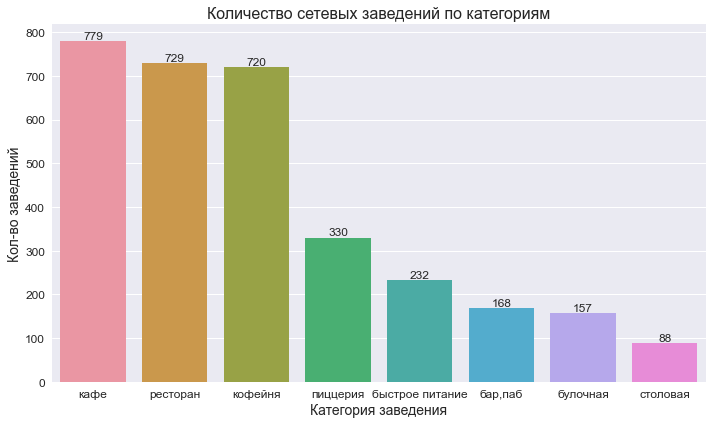

In [53]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='category', 
                   data=data_is_chain,
                  order=data_is_chain['category'].value_counts().index)
ax.bar_label(ax.containers[0], size=12)
plt.title('Количество сетевых заведений по категориям', fontsize=16)
plt.xlabel('Категория заведения', fontsize=14)
plt.ylabel('Кол-во заведений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

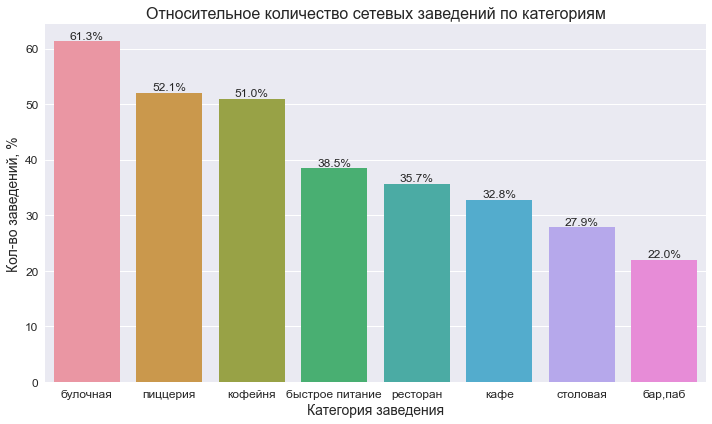

In [54]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='category', 
                   y='ratio',
                   data=data_is_chain_grouped)
ax.bar_label(ax.containers[0], size=12, fmt='%.1f%%')
plt.title('Относительное количество сетевых заведений по категориям', fontsize=16)
plt.xlabel('Категория заведения', fontsize=14)
plt.ylabel('Кол-во заведений, %', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

**Вывод:**

Среди сетевых заведений больше всего кафе, ресторанов и кофеен. 

Однако, если посмотреть на долю сетевых заведений относительно общего количества, то лидирует категория булочные (более 60% сетевых), среди пиццерий и кафе примерно 50% сетевые, у остальных категорий сетевыми являются менее 40% заведений, среди баров/пабов процент сетевых наименьший (22%).

<a id="11"></a>
#### ТОП-15 сетей в Москве

**Найдем 15 наиболее популярных сетей в Москве.**

In [55]:
top_chain = data_is_chain.groupby('name', as_index=False)['category'].count()
top_chain.columns = ['name', 'number']
top_chain = top_chain.sort_values(by='number', ascending=False).reset_index(drop=True).head(15)

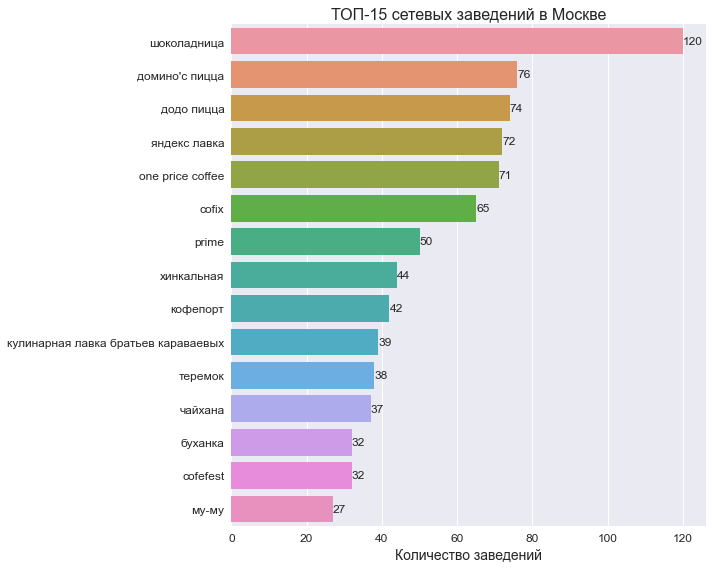

In [56]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='number', y='name', data=top_chain)
ax.bar_label(ax.containers[0], size=12)
plt.title('ТОП-15 сетевых заведений в Москве', fontsize=16)
plt.xlabel('Количество заведений', fontsize=14)
plt.ylabel(None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

**Вывод:**

Шоколадница имеет наибольшее количество заведений в Москве, также в тройку вошли Домино'с Пицца и Додо Пицца, закрывают топ-15 CofeFest и Му-Му.

**Определим к каким категориям относятся крупные сети.**

In [57]:
top_names = list(top_chain['name'])
top_places = data_is_chain.query('name in @top_names')

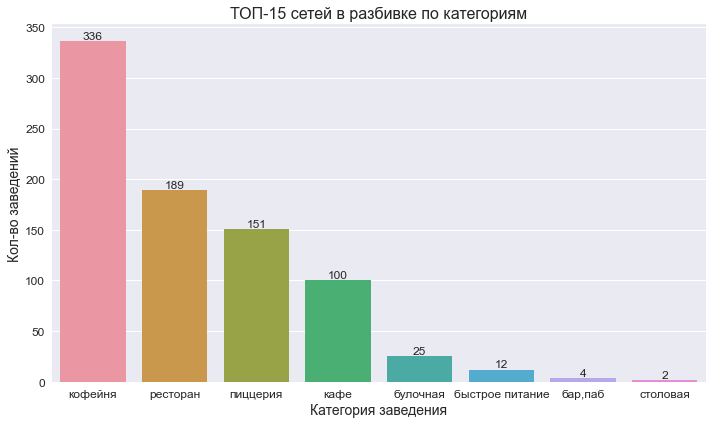

In [58]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='category', 
                   data=top_places,
                  order=top_places['category'].value_counts().index)
ax.bar_label(ax.containers[0], size=12)
plt.title('ТОП-15 сетей в разбивке по категориям', fontsize=16)
plt.xlabel('Категория заведения', fontsize=14)
plt.ylabel('Кол-во заведений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

**Вывод:**

Несмотря на то, что среди всех сетевых заведений количество кафе было наибольшим, среди крупных сетей оказалось больше всего кофеен, далее идут рестораны (их в 2 раза меньше) и пиццерии, самыми непопулярными оказались категории бар/паб и столовая.

**Отобразим количество заведений каждой категории по районам**

In [59]:
top_places_grouped_by_dictrict_category = (
    top_places.pivot_table(index='district_short', columns='category', values='name', aggfunc='count')
).fillna(0)
top_places_grouped_by_dictrict_category['total_district'] = top_places_grouped_by_dictrict_category.sum(axis=1)
top_places_grouped_by_dictrict_category = top_places_grouped_by_dictrict_category.sort_values(by='total_district', 
                                                                                    ascending=False)
top_places_grouped_by_dictrict_category

category        бар,паб  булочная  быстрое питание  кафе  кофейня  пиццерия  \
district_short                                                                
ЦАО                 1.0       1.0              2.0  47.0     94.0       9.0   
ЗАО                 0.0       5.0              1.0   8.0     41.0      15.0   
ЮАО                 0.0       0.0              0.0   4.0     34.0      23.0   
САО                 0.0       8.0              0.0   7.0     40.0      20.0   
СВАО                0.0       6.0              2.0   6.0     37.0      19.0   
ВАО                 2.0       1.0              2.0   6.0     30.0      20.0   
ЮЗАО                1.0       1.0              1.0   9.0     25.0      16.0   
ЮВАО                0.0       0.0              2.0  12.0     15.0      16.0   
СЗАО                0.0       3.0              2.0   1.0     20.0      13.0   

category        ресторан  столовая  total_district  
district_short                                      
ЦАО                 60.0       1.0           215.0  
ЗАО                 19.0       0.0            89.0  
ЮАО                 28.0       0.0            89.0  
САО                 13.0       0.0            88.0  
СВАО                15.0       0.0            85.0  
ВАО                 18.0       1.0            80.0  
ЮЗАО                17.0       0.0            70.0  
ЮВАО                11.0       0.0            56.0  
СЗАО                 8.0       0.0            47.0

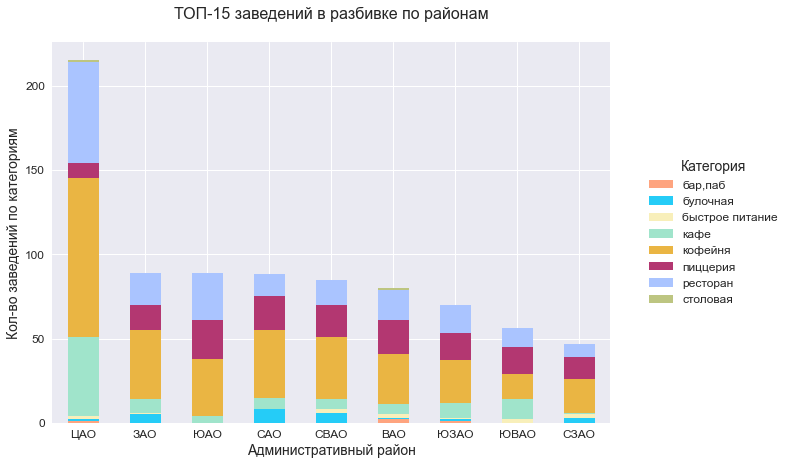

In [60]:
colors= ['#FEA47F', '#25CCF7', '#F8EFBA', '#A0E4CB', '#EAB543', '#B33771', '#AAC4FF', '#BDC581']
ax = top_places_grouped_by_dictrict_category.iloc[:, :-1].plot(kind='bar', stacked=True, figsize=(10,7), color=colors)
plt.title('ТОП-15 заведений в разбивке по районам\n', fontsize=16)
plt.xlabel('Административный район', fontsize=14)
plt.ylabel('Кол-во заведений по категориям', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, title='Категория', bbox_to_anchor=(1.05, 0.5), loc='center left', title_fontsize=14);

**Вывод:**

Наибольшее количество заведений из топ-15 сетей расположено в Центральном административном округе (212 заведений), в остальных районах расположено от 87 до 47 заведений. Самый непопулярный район - СЗАО.

Во всех округах по количеству открытых заведений лидирует категория кофейни, в ЦАО, ЗАО и ЮАО, ЮЗАО на втором месте по распространенности рестораны, в тройку категорий в ЦАО также входит категория кафе, в остальных округах в тройку входят пиццерии и рестораны, а кафе менее распространены.

<a id="4"></a>
#### Анализ категорий заведений по районам

Отобразим количество заведений каждой категории по районам.

In [61]:
data_groupded_by_district_category = (
    data.pivot_table(index='district_short', columns='category', values='name', aggfunc='count')
)
data_groupded_by_district_category['total_district'] = data_groupded_by_district_category.sum(axis=1)
data_groupded_by_district_category = data_groupded_by_district_category.sort_values(by='total_district', 
                                                                                    ascending=False)
data_groupded_by_district_category

category        бар,паб  булочная  быстрое питание  кафе  кофейня  пиццерия  \
district_short                                                                
ЦАО                 364        50               87   464      428       113   
САО                  68        39               58   235      193        77   
ЮАО                  68        25               85   264      131        73   
СВАО                 62        28               82   269      159        68   
ЗАО                  50        37               62   238      150        71   
ВАО                  53        25               71   272      105        72   
ЮВАО                 38        13               67   282       89        55   
ЮЗАО                 38        27               61   238       96        64   
СЗАО                 23        12               30   115       62        40   

category        ресторан  столовая  total_district  
district_short                                      
ЦАО                  670        66            2242  
САО                  188        41             899  
ЮАО                  202        44             892  
СВАО                 182        40             890  
ЗАО                  218        24             850  
ВАО                  160        40             798  
ЮВАО                 145        25             714  
ЮЗАО                 168        17             709  
СЗАО                 109        18             409

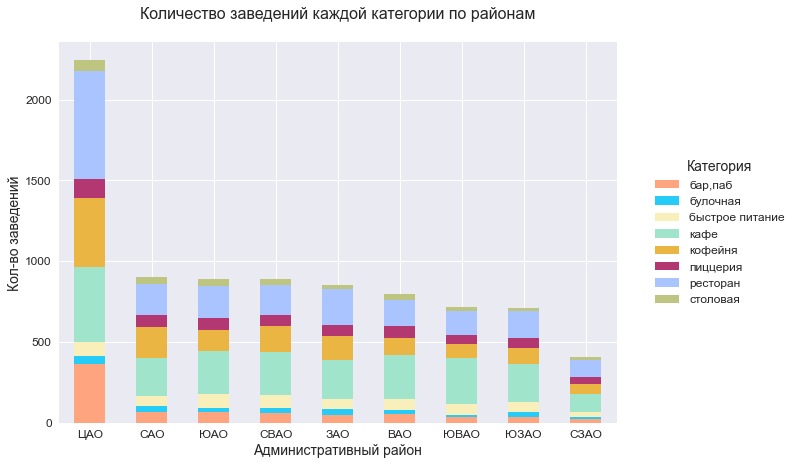

In [62]:
colors= ['#FEA47F', '#25CCF7', '#F8EFBA', '#A0E4CB', '#EAB543', '#B33771', '#AAC4FF', '#BDC581']
data_groupded_by_district_category.iloc[:, :-1].plot(kind='bar', stacked=True, figsize=(10,7), color=colors)
plt.title('Количество заведений каждой категории по районам\n', fontsize=16)
plt.xlabel('Административный район', fontsize=14)
plt.ylabel('Кол-во заведений', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, title='Категория', bbox_to_anchor=(1.05, 0.5), loc='center left', title_fontsize=14);

Отобразим процентное соотношение количества заведений каждой категории по районам.

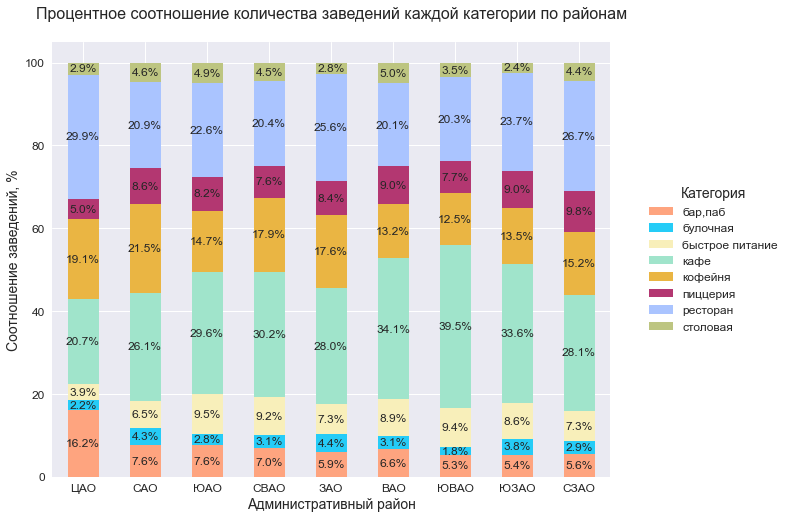

In [63]:
colors= ['#FEA47F', '#25CCF7', '#F8EFBA', '#A0E4CB', '#EAB543', '#B33771', '#AAC4FF', '#BDC581']
ax=(
    data_groupded_by_district_category.iloc[:, :-1]
    .apply(lambda x: x*100/sum(x), axis=1)
    .plot(kind='bar', stacked=True, figsize=(10,8), color=colors)
)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.1f%%', label_type='center', size=12)
plt.title('Процентное соотношение количества заведений каждой категории по районам\n', fontsize=16)
plt.xlabel('Административный район', fontsize=14)
plt.ylabel('Соотношение заведений, %', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, title='Категория', bbox_to_anchor=(1.05, 0.5), loc='center left', title_fontsize=14);

**Вывод:**

Больше всего заведений расположено в ЦАО (более 2000), меньше всего - в СЗАО (409), в остальных округах расположено от 90 до 700 завдений.

В ЦАО наибольшая доля ресторанов и баров/пабов, в ЮВАО и ВАО наибольшая доля кафе. Во всех округах доля кафе, ресторанов и кофеен наибольшая.

<a id="5"></a>
#### Анализ рейтингов заведений по категориям

Построим распределение рейтингов по категориям заведений.

In [73]:
order=data.groupby('category')['rating'].median().sort_values(ascending=False).index

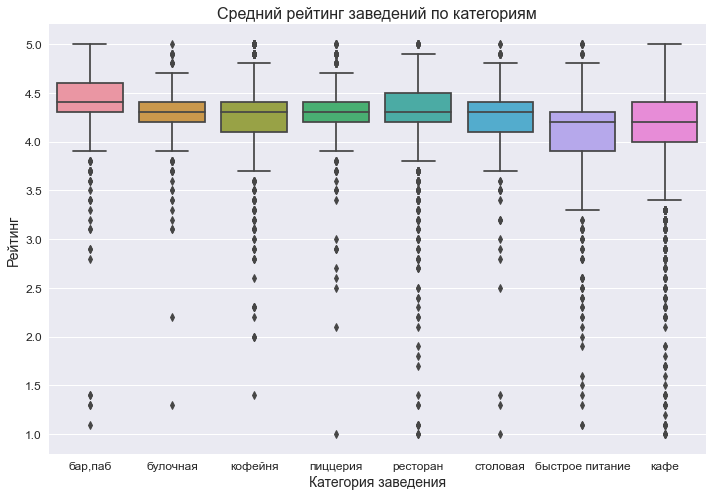

In [74]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(y='rating', x='category', data=data, order=order)
plt.title('Средний рейтинг заведений по категориям', fontsize=16)
plt.xlabel('Категория заведения', fontsize=14)
plt.ylabel('Рейтинг', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

**Вывод:**

Медиана рейтинга у заведений заметно не отличается и находится в диапазоне от 4.2 до 4.4, но распределение рейтинга у категории бар/паб лежит заметно выше остальных и имеет не так много выбросов с очень низкими оценками. У категории быстрое питание 1 и 3 квартили находятся наиболее низко, то есть большая оценок ниже, чем у остальных категорий. Рестораны, кафе и заведения быстрого питания имеют довольно много выбросов с низкими оценками. 

#### Построим фоновую картограмму (хороплет) со средним рейтингом заведений каждого района

In [77]:
data_rating = data.groupby('district', as_index=False)['rating'].mean().round(1)

In [78]:
state_geo = 'admin_level_geomap.geojson'
with open(state_geo, encoding='utf-8') as f:
    gj = json.load(f)
    
# moscow_lat и moscow_lng - широта и долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаем карту Москвы
m = folium.Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
cp = folium.Choropleth(
    geo_data=gj,
    data=data_rating,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам Москвы'
).add_to(m)

# создаем проиндексированную версию датафрейма
data_rating_indexed = data_rating.set_index('district')
 
# идем по geojson-у и добавляем новую фичу со значением из датафрейма
for s in cp.geojson.data['features']:
    s['properties']['rating'] = data_rating_indexed.loc[s['name'], 'rating']
# добавляем ховер к хороплету
folium.features.GeoJsonTooltip(['name', 'rating']).add_to(cp.geojson)
folium.LayerControl().add_to(m)

m

#### Отобразим все заведения на карте

При попытке отобразить все заведения, карта не отображалась, поэтому отобразим первые 1000 заведений

In [79]:
marker_icons = {
         'ресторан': 'https://cdn-icons-png.flaticon.com/512/1046/1046874.png',
         'кафе': 'https://cdn-icons-png.flaticon.com/512/640/640673.png',
         'кофейня': 'https://img.icons8.com/ios/512/coffee-to-go.png',
         'пиццерия': 'https://img.icons8.com/pastel-glyph/512/pizza.png',
         'бар,паб': 'https://cdn-icons-png.flaticon.com/512/745/745543.png',
         'булочная': 'https://img.icons8.com/ios/512/bread.png',
         'быстрое питание': 'https://img.icons8.com/pastel-glyph/512/fast-food--v2.png',
         'столовая': 'https://img.icons8.com/external-basicons-line-edtgraphics/512/external-Food-tray-dishes-basicons-line-edtgraphics.png'
    }

In [80]:
def show_places_on_map(data, marker_icons=marker_icons):
    
    # Создаем карту Москвы
    m = folium.Map(location=[moscow_lat, moscow_lng], zoom_start=10)

    # создаем пустой кластер и добавляем его на карту
    marker_cluster = MarkerCluster().add_to(m)

    # функция, которая пройдет по каждой строке датафрейма, создаст маркер
    # и добавит его в marker_cluster
    def create_clusters(row):
        for key, value in marker_icons.items():
            if key == row['category']:
                icon = CustomIcon(value, icon_size=(30, 30))

        folium.Marker(
            [row['lat'], row['lng']],
            popup=f"{row['name']} {row['rating']}",
            icon=icon
        ).add_to(marker_cluster)

    # создаем маркеры
    data.apply(create_clusters, axis=1)
    
    display(m)

In [81]:
show_places_on_map(data[2000:3000])

<a id="6"></a>
#### ТОП-15 улиц по количеству заведений

In [82]:
top_streets = data.groupby('street', as_index=False)['name'].count()
top_streets.columns = ['street', 'number']
top_streets = top_streets.sort_values(by='number', ascending=False).reset_index(drop=True).head(15)
top_streets

street  number
0            проспект Мира     183
1        Профсоюзная улица     122
2     проспект Вернадского     108
3       Ленинский проспект     107
4   Ленинградский проспект      95
5        Дмитровское шоссе      88
6          Каширское шоссе      77
7         Варшавское шоссе      76
8      Ленинградское шоссе      70
9                     МКАД      65
10        Люблинская улица      60
11          улица Вавилова      55
12    Кутузовский проспект      54
13    улица Миклухо-Маклая      49
14         Пятницкая улица      48

**Посмотрим, как заведения распределены по категориям на популярных улицах.**

In [83]:
top_street_names = list(top_streets['street'])
top_street_places = data.query('street in @top_street_names')

In [84]:
data_groupded_by_street_category = (
    top_street_places.pivot_table(index='street', columns='category', values='name', aggfunc='count')
)
data_groupded_by_street_category['total_street'] = data_groupded_by_street_category.sum(axis=1)
data_groupded_by_street_category = data_groupded_by_street_category.sort_values(by='total_street')
data_groupded_by_street_category = data_groupded_by_street_category.fillna(0)

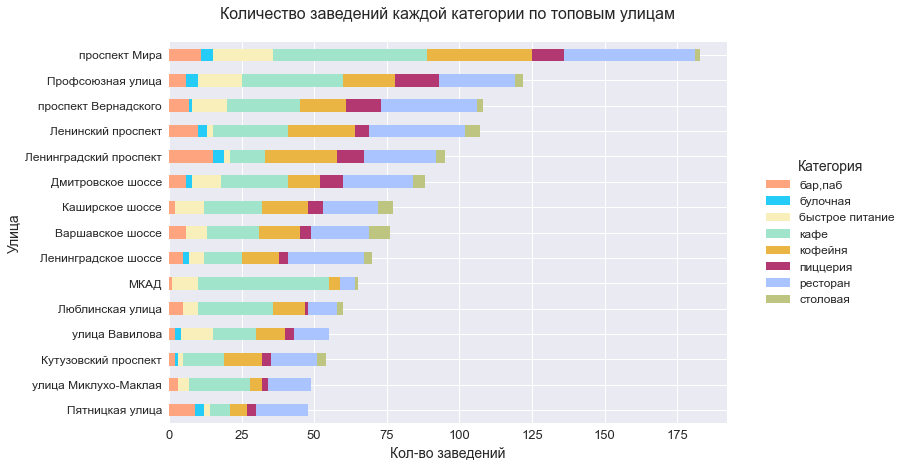

In [85]:
colors= ['#FEA47F', '#25CCF7', '#F8EFBA', '#A0E4CB', '#EAB543', '#B33771', '#AAC4FF', '#BDC581']
(
    data_groupded_by_street_category.iloc[:, :-1]
    .plot(kind='barh', stacked=True, figsize=(10,7), color=colors)
)
plt.title('Количество заведений каждой категории по топовым улицам\n', fontsize=16)
plt.ylabel('Улица', fontsize=14)
plt.xlabel('Кол-во заведений', fontsize=14)
plt.xticks(fontsize=13, )
plt.yticks(fontsize=12)
plt.legend(fontsize=12, title='Категория', bbox_to_anchor=(1.05, 0.5), loc='center left', title_fontsize=14);

**Вывод:**

Наибольшее количество заведений открыто на Проспекте Мира, Профсоюзной улице и Ленинском проспекте, закрывает топ-15 улиц - Алтуфьевское шоссе. Эти улицы являются наиболее протяженными и крупными в Москве, вдоль них расположено множество станций метро и торговых центров, что делает их лидерами по количеству открытых заведений.

**Посмотрим, на процентное соотношение количества заведений по категориям на популярных улицах.**

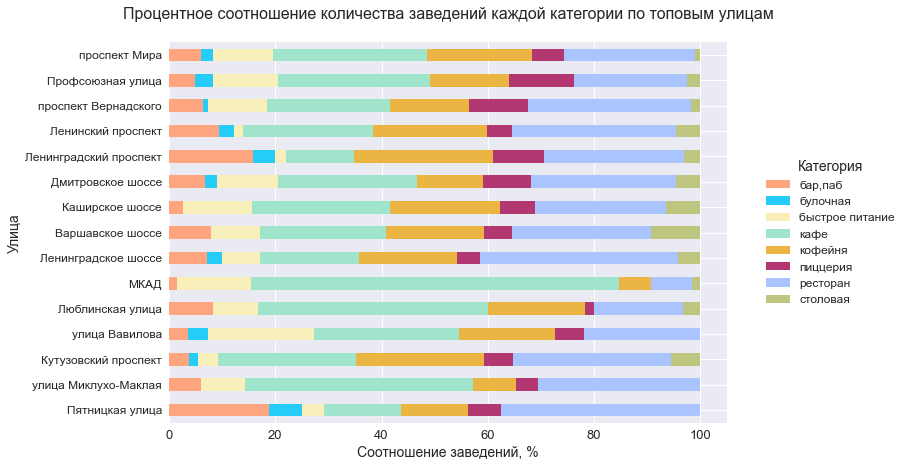

In [86]:
colors= ['#FEA47F', '#25CCF7', '#F8EFBA', '#A0E4CB', '#EAB543', '#B33771', '#AAC4FF', '#BDC581']
(
    data_groupded_by_street_category.iloc[:, :-1]
    .apply(lambda x: x*100/sum(x), axis=1)
    .plot(kind='barh', stacked=True, figsize=(10,7), color=colors)
)
plt.title('Процентное соотношение количества заведений каждой категории по топовым улицам\n', fontsize=16)
plt.ylabel('Улица', fontsize=14)
plt.xlabel('Соотношение заведений, %', fontsize=14)
plt.xticks(fontsize=13, )
plt.yticks(fontsize=12)
plt.legend(fontsize=12, title='Категория', bbox_to_anchor=(1.05, 0.5), loc='center left', title_fontsize=14);

**Вывод:**

На МКАДе и Люблинской улице находится заметно больше кафе, по сравнению с другими категориями. В свою очередь на Ленинградском шоссе и Пятницкой улице преобладают рестораны, это связано с тем, что Ленинградское шоссе проходит вдоль набережной канала им.Москвы и там же расположена большая парковая зона, а Пятницкое шоссе расположено в центре Москвы. Наибольшее количество заведений быстрого питания на улице Вавилова, что может быть связано с тем, что рядом находится множество институтов и школ.
По количеству баров и пабов лидирует Ленинградский проспект.

**Посмотрим, в каких округах расположены топ-15 популярных улиц.**

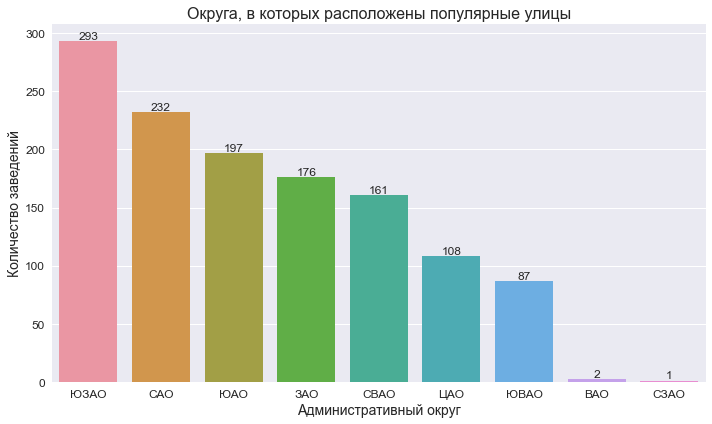

In [87]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='district_short', 
                   data=top_street_places,
                  order=top_street_places['district_short'].value_counts().index)
ax.bar_label(ax.containers[0], size=12)
plt.title('Округа, в которых расположены популярные улицы', fontsize=16)
plt.xlabel('Административный округ', fontsize=14)
plt.ylabel('Количество заведений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

**Вывод:**

Наиболее популярные улицы расположены в Юго-Западном, Северном и Южном Административных округах.

<a id="7"></a>
#### Улицы, на которых расположен 1 объект общепита

Найдем улицы, на которых расположен всего 1 объект общепита и посмотрим, как на них распределены категории заведений.

In [88]:
unpopular_streets = data.groupby('street', as_index=False)['name'].count().query('name == 1').reset_index(drop=True)
unpopular_streets_list = list(unpopular_streets['street'])

# посмотрим к каким категориям относятся заведения
unpopular_street_places = data.query('street in @unpopular_streets_list')

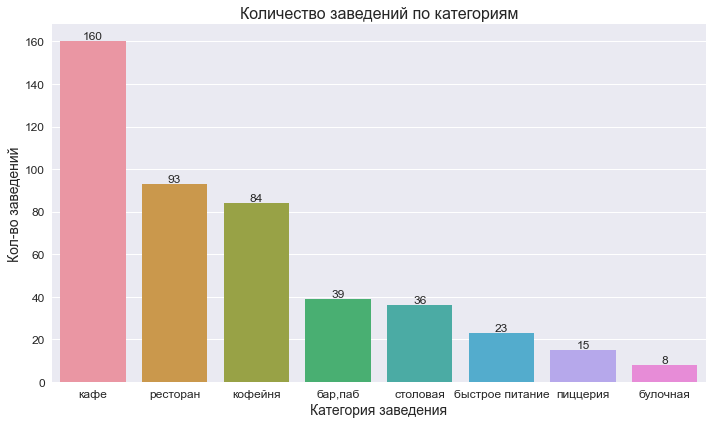

In [89]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='category', 
                   data=unpopular_street_places,
                  order=unpopular_street_places['category'].value_counts().index)
ax.bar_label(ax.containers[0], size=12)
plt.title('Количество заведений по категориям', fontsize=16)
plt.xlabel('Категория заведения', fontsize=14)
plt.ylabel('Кол-во заведений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

**Вывод:**

На улицах, где есть только 1 объект общепита, чаще всего можно увидеть кафе, также в тройку входят рестораны и кофейни.

**Отобразим эти заведения на карте.**

In [90]:
show_places_on_map(unpopular_street_places)

**Вывод:**

Чаще одиночные заведения расположены на небольших улицах и переулках. Много таких завдеений расположено ближе к центру, внутри садового кольца, что может быть связано с тем, что в центре довольно много маленьких улочек и для других заведений не хватает места.

<a id="8"></a>
#### Анализ среднего чека заведений по районам

In [91]:
median_bill_by_district = (
    data.groupby('district', as_index=False)['middle_avg_bill']
    .median()
    .sort_values(by='middle_avg_bill', ascending=False)
)
median_bill_by_district.style.format({'middle_avg_bill': '{:.0f}'})

In [92]:
# создаем карту Москвы
m = folium.Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
cp = folium.Choropleth(
    geo_data=gj,
    data=median_bill_by_district,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    legend_name='Медиана среднего чека заведений по районам Москвы'
).add_to(m)

# создаем проиндексированную версию датафрейма
data_rating_indexed = median_bill_by_district.set_index('district')
 
# идем по geojson-у и добавляем новую фичу со значением из датафрейма
for s in cp.geojson.data['features']:
    s['properties']['middle_avg_bill'] = data_rating_indexed.loc[s['name'], 'middle_avg_bill']
# добавляем ховер к хороплету
folium.features.GeoJsonTooltip(['name', 'middle_avg_bill']).add_to(cp.geojson)
folium.LayerControl().add_to(m)

m

**Вывод:**

В Центральном и Западном административном округе средний чек наиболее высокий. Наиболее низкие цены в Северо-Восточном, Южном и Юго-Восточном административных округах. Чем дальше от центра, тем цены ниже.

<a id="9"></a>
#### Анализ часов работы заведений

Посмотрим, какие категории заведений чаще работают круглосуточно.

In [93]:
# посчитаем сколько заведений являются круглосуточными относительно 
# общего количества заведений в этой категории
data_all_day = data[data['is_24/7'] == True]
data_all_day_grouped = (
    data_all_day
    .groupby('category', as_index=False)['name'].count()
    .rename(columns={'name': 'quantity'})
)

# сгруппируем с датафреймом, в котором хранится общее количество заведений по категориям
data_all_day_grouped = (
    data_all_day_grouped
    .merge(data_by_category, how='left', on='category', suffixes=('_24/7', '_all'))
)
data_all_day_grouped['ratio'] = round((
    data_all_day_grouped['quantity_24/7'] /
    data_all_day_grouped['quantity_all']
) * 100, 1)
data_all_day_grouped = data_all_day_grouped.sort_values(by='ratio', ascending=False)
data_all_day_grouped.style.format({'ratio': '{:.1f}%'})

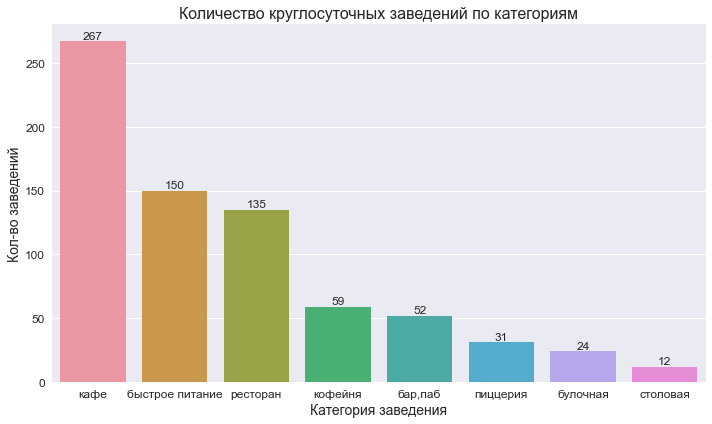

In [94]:
order = data_all_day_grouped.set_index('category').sort_values(by='quantity_24/7', ascending=False).index
plt.figure(figsize=(10,6))
ax = sns.barplot(x='category', 
                 y='quantity_24/7',
                 data=data_all_day_grouped,
                 order=order
                )
ax.bar_label(ax.containers[0], size=12)
plt.title('Количество круглосуточных заведений по категориям', fontsize=16)
plt.xlabel('Категория заведения', fontsize=14)
plt.ylabel('Кол-во заведений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

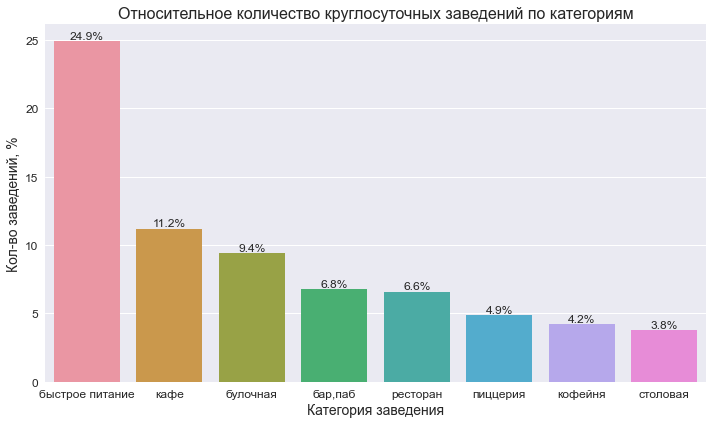

In [95]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='category', 
                   y='ratio',
                   data=data_all_day_grouped)
ax.bar_label(ax.containers[0], size=12, fmt='%.1f%%')
plt.title('Относительное количество круглосуточных заведений по категориям', fontsize=16)
plt.xlabel('Категория заведения', fontsize=14)
plt.ylabel('Кол-во заведений, %', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

**Вывод:**

Наибольшее количество круглосуточных заведений среди кафе, заведений быстрого питания и ресторанов.

Четверть всех столовых в датасете является круглосуточными, среди кафе 11% являются круглосуточными, у остальных категорий круглосуточными являются менее 10% заведений.

Посмотрим, как расположены круглосуточные завдения.

In [96]:
show_places_on_map(unpopular_street_places)

**Вывод:**

Большое количество круглосуточных заведений находится в центре Москвы, но в тоже время и в остальных частях Москвы также велика вероятность найти круглосуточное заведение.

**Общий вывод по разделу 3:**
    
1. Анализ всех заведений:
    
    [1.1.](#1) Кафе и рестораны являются наиболее распространенными видами заведений в Москве, столовых и булочных меньше всего.
    
    [1.2.](#2) Больше всего посадочных мест в ресторанах и барах/пабах, при этом в пиццериях и булочных наименьшее количество мест.У заведений быстрого питания досточно сильный разброс значений, граница 1 квартиля самя низкая, при этом граница 3 квартиля сравнима с первой тройкой заведений, у которых наиболее высокая медиана и граница 3 квартиля. В столовых разброс значений наименьший и 3 квартиль находится наиболее низко.
    
    [1.3.](#3) Несетевых заведений оказалось больше (62%), при этом заведения, являющиеся частью сети составляют значительную долю от общего количества заведений.
    
    [1.4.](#4) Больше всего заведений расположено в ЦАО (более 2000), меньше всего - в СЗАО (409). В ЦАО наибольшая доля ресторанов и баров/пабов, в ЮВАО и ВАО наибольшая доля кафе. Во всех округах доля кафе, ресторанов и кофеен наибольшая.
    
    [1.5.](#5) Медиана рейтинга у заведений заметно не отличается и находится в диапазоне от 4.2 до 4.4, но распределение рейтинга у категории бар/паб лежит заметно выше остальных и имеет не так много выбросов с очень низкими оценками. У категории быстрое питание 1 и 3 квартили находятся наиболее низко, то есть большая оценок ниже, чем у остальных категорий. Рестораны, кафе и заведения быстрого питания имеют довольно много выбросов с низкими оценками.
    
    [1.6.](#6) Наибольшее количество заведений открыто на Проспекте Мира, Профсоюзной улице и Ленинском проспекте, закрывает топ-15 улиц - Алтуфьевское шоссе. Эти улицы являются наиболее протяженными и крупными в Москве, что делает их лидерами по количеству открытых заведений.
    
    [1.7.](#7) На улицах, где есть только 1 объект общепита, чаще всего можно увидеть кафе, также в тройку входят рестораны и кофейни. Чаще одиночные заведения встречаются ближе к центру, внутри садового кольца, что может быть связано с тем, что в центре довольно много маленьких улочек, также фактором может быть высокая стоимость аренды.
    
    [1.8.](#8) В Центральном и Западном административном округе средний чек наиболее высокий. Наиболее низкие цены в Северо-Восточном, Южном и Юго-Восточном административных округах. Чем дальше от центра, тем цены ниже.
    
    [1.9.](#9) Наибольшее количество круглосуточных заведений среди кафе, заведений быстрого питания и ресторанов. Четверть всех столовых в датасете является круглосуточными, среди кафе 11% являются круглосуточными, у остальных категорий круглосуточными являются менее 10% заведений. Большое количество круглосуточных заведений находится в центре Москвы, но в тоже время и в остальных частях Москвы также велика вероятность найти круглосуточное заведение.
    
    
2. Анализ сетевых заведений:

   [2.1.](#10) Среди сетевых заведений больше всего кафе, ресторанов и кофеен. Однако, если посмотреть на долю сетевых заведений относительно общего количества, то лидирует категория булочные (более 60% сетевых), среди пиццерий и кафе примерно 50% сетевые, у остальных категорий сетевыми являются менее 40% заведений, среди баров/пабов процент сетевых наименьший (22%).
    
    [2.2.](#11) Несмотря на то, что среди всех сетей наиболее популярной была категория кафе, среди топ-15 крупных сетей больше всего кофеен, далее идут рестораны (их в 2 раза меньше) и пиццерии, самыми непопулярными оказались категории бар/паб и столовая. Наибольшее количество заведений из топ-15 сетей расположено в Центральном административном округе (212 заведений), в остальных районах расположено от 87 до 47 заведений. Самый непопулярный район - СЗАО.Во всех округах по количеству открытых заведений лидирует категория кофейни, в ЦАО, ЗАО и ЮАО, ЮЗАО на втором месте по распространенности рестораны, в тройку категорий в ЦАО также входит категория кафе, в остальных округах в тройку входят пиццерии и рестораны, а кафе менее распространены. Шоколадница, Домино'с Пицца и Додо Пицца наиболее крупные сети в Москве.

### Открытие кофейни

**Посмотрим, сколько всего кофеен в датасете.**

In [97]:
coffee_data = data.query('category == "кофейня"')
print(f'Всего кофеен {coffee_data.shape[0]}')

Всего кофеен 1413


В Москве достаточно большое количество кофеен, среди всех категорий они находятся на 3 месте по количеству открытых заведений.

**Отметим кофейни на карте.**

In [98]:
show_places_on_map(coffee_data[:1000])

In [99]:
show_places_on_map(coffee_data[1000:])

**Вывод:**

Наибольшая концентрация кофеен в Центральном, Западном, Северном и Северо-Восточном административных округах. Это наиболее дорогостоящие районы Москвы. 

В центре кофейни расположены вдоль популярных маршрутов для прогулок жителей и туристов, дальше от центра кофейни располагаются вдоль крупных проспектов, шоссе и улиц, около станций метро, особенно если станции находятся рядом с парками или большими тц, а также внутри тц.

**Посмотрим, сколько круглосуточных кофеен относительно общего числа открытых кофеен в Москве.**

In [100]:
data_all_day_grouped.query('category == "кофейня"').reset_index(drop=True).style.format({'ratio': '{:.1f}%'})

Доля круглосуточных кофеен невелика - 4.2% от общего количества.

**Посмотрим, как распределены рейтинги кофеен.**

In [101]:
coffee_data_grouped = coffee_data.groupby('district', as_index=False)['rating'].mean()
coffee_data_grouped['rating'] = coffee_data_grouped['rating'].round(1)
coffee_data_grouped

district  rating
0         Восточный административный округ     4.3
1          Западный административный округ     4.2
2          Северный административный округ     4.3
3  Северо-Восточный административный округ     4.2
4   Северо-Западный административный округ     4.3
5       Центральный административный округ     4.3
6     Юго-Восточный административный округ     4.2
7      Юго-Западный административный округ     4.3
8             Южный административный округ     4.2

In [102]:
# создаем карту Москвы
m = folium.Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
cp = folium.Choropleth(
    geo_data=gj,
    data=coffee_data_grouped,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам Москвы',
    
).add_to(m)

# создаем проиндексированную версию датафрейма
coffee_data_grouped_indexed = coffee_data_grouped.set_index('district')
 
# идем по geojson-у и добавляем новую фичу со значением из датафрейма
for s in cp.geojson.data['features']:
    s['properties']['rating'] = coffee_data_grouped_indexed.loc[s['name'], 'rating']
# добавляем ховер к хороплету
folium.features.GeoJsonTooltip(['name', 'rating']).add_to(cp.geojson)
folium.LayerControl().add_to(m)

m

В Центральном, Юго-Западном, Северо-Западном, Северном и Восточном административном округах рейтинг чуть выше, чем в остальных районах, но отличия минимальны.

**Посмотрим, какая цена чашки кофе будет ждать нас в различных районах.**

In [103]:
median_cup_by_district = (
    data.groupby('district', as_index=False)['middle_coffee_cup']
    .median()
    .sort_values(by='middle_coffee_cup', ascending=False)
    .reset_index(drop=True)
)
median_cup_by_district.style.format({'middle_coffee_cup': '{:.0f}'})

In [104]:
# создаем карту Москвы
m = folium.Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
cp = folium.Choropleth(
    geo_data=gj,
    data=median_cup_by_district,
    columns=['district', 'middle_coffee_cup'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    legend_name='Средняя стоимость чашки кофе по районам Москвы'
).add_to(m)

# создаем проиндексированную версию датафрейма
median_cup_by_district_indexed = median_cup_by_district.set_index('district')
 
# идем по geojson-у и добавляем новую фичу со значением из датафрейма
for s in cp.geojson.data['features']:
    s['properties']['middle_coffee_cup'] = median_cup_by_district_indexed.loc[s['name'], 'middle_coffee_cup']
# добавляем ховер к хороплету
folium.features.GeoJsonTooltip(['name', 'middle_coffee_cup']).add_to(cp.geojson)
folium.LayerControl().add_to(m)

m

Наиболее высокая стоимость чашки кофе ждет покупателей в Юго-Западном, Центральном и Западном АО. Самое дешевое кофе в Восточном АО.

**Посмотрим, как распределено количество кофеен в сетевых заведениях.**

In [105]:
coffee_data_chain = coffee_data.groupby('name', as_index=False)['category'].count()
coffee_data_chain.columns = ['name', 'number']
coffee_data_chain = coffee_data_chain.query('number > 1')

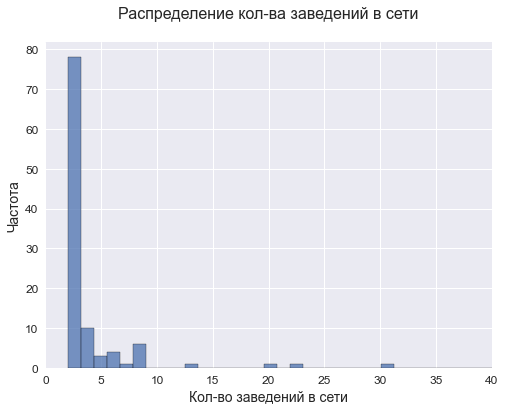

In [106]:
plt.figure(figsize=(8,6))
sns.histplot(coffee_data_chain, x='number', bins=100)
plt.title('Распределение кол-ва заведений в сети\n', fontsize=16)
plt.ylabel('Частота', fontsize=14)
plt.xlabel('Кол-во заведений в сети', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 40);

Чаще всего сетевые кофейни открывают три точки.

**Вывод по разделу 4:**

1. Несмотря на большое количество открытых кофеен в Москве, круглосуточных всего 4.2%, поэтому можно открыть круглосуточное заведение.
2. В качестве расположения стоит рассмотреть Центральный, Западаный и Юго-Западный АО. В центре Москвы большое количество популярных маршрутов для прогулок жителей и туристов, что обеспечит высокий поток посетителей. Западный и Юго-Западный округа лидируют по средней стоимости чашки кофе. Можно расположить кофейню в районе парка горького или МГУ.
3. Если открывать сетевое заведение, то можно начать с 3 точек.
4. Стоимость чашки кофе можно установить в пределах 185-190 руб. Это будет соответствовать медианному значению стоимости чашки кофе в выбранных районах. Посетителей не отпугнет слишком высокая или слишком низкая цена (что часто кажется подозрительным покупателю).

### Ссылка на презентацию

Презентация: <https://disk.yandex.ru/i/b-dcyKFJh8UOyQ>